<a href="https://colab.research.google.com/github/JayeshSuryavanshi/CSE-587-DIC/blob/main/587_DIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import folium
import pandas as pd
import csv
import numpy as np
from scipy.signal import savgol_filter
import plotly.graph_objects as go
from plotly.colors import DEFAULT_PLOTLY_COLORS
import plotly.express as px
import plotly.offline as py

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
dataframe = pd.read_csv("/content/drive/MyDrive/DIC DATA/GlobalLandTemperaturesByCity.csv")
dataframe.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [46]:
dataframe.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [47]:
dataframe.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [48]:
dataframe.shape

(8599212, 7)

In [49]:
dataframe.isnull().sum()


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [50]:
dataframe.nunique()

dt                                 3239
AverageTemperature               103481
AverageTemperatureUncertainty     10902
City                               3448
Country                             159
Latitude                             73
Longitude                          1227
dtype: int64

In [51]:
df1 = dataframe['AverageTemperature'].interpolate(method="linear")
df1

0           6.068
1           6.012
2           5.956
3           5.900
4           5.844
            ...  
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
8599211    18.025
Name: AverageTemperature, Length: 8599212, dtype: float64

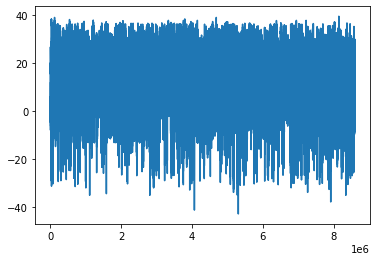

In [52]:
df1.plot()

**Just playing around with other datasets**


In [53]:
Months = ['January','February','March','April','May','June','July',
 'August','September', 'October','November','December']
datasets = ['GlobalLandTemperaturesByCity.csv',
            'GlobalLandTemperaturesByCountry.csv',
            'GlobalLandTemperaturesByMajorCity.csv',
            'GlobalLandTemperaturesByState.csv',
            'GlobalTemperatures.csv']

dictionary = {}
for f in datasets:
    df = pd.read_csv('/content/drive/MyDrive/DIC DATA/'+f,  index_col = 0)
    df.index = pd.to_datetime(df.index)
    dictionary.update({f.split('.')[0].split('By')[-1]: df})
print(dictionary.keys())

dict_keys(['City', 'Country', 'MajorCity', 'State', 'GlobalTemperatures'])


In [54]:
temps_ny = dictionary['City'][dictionary['City'].City == 'New York'][['AverageTemperature', 'AverageTemperatureUncertainty']].copy()
temps_ny.index = pd.to_datetime(temps_ny.index)
temps_ny['Year'] = [x.year for x in temps_ny.index]
temps_ny['Month'] = [a.month for a in temps_ny.index]
temps_ny = temps_ny.groupby(['Year','Month']).mean()
temps_ny.reset_index(inplace = True)
temps_ny

,Year,Month,AverageTemperature,AverageTemperatureUncertainty
0,1743,11,3.264,1.665
1,1743,12,NaN,NaN
2,1744,1,NaN,NaN
3,1744,2,NaN,NaN
4,1744,3,NaN,NaN
...,...,...,...,...
3234,2013,5,15.544,0.281
3235,2013,6,20.892,0.273
3236,2013,7,24.722,0.279
3237,2013,8,21.001,0.323


In [55]:
years = np.unique(temps_madrid.Year)
fig = go.Figure(
    data = [
        go.Scatterpolar(
            r = temps_madrid[temps_madrid.Year == years[0]].AverageTemperature,
            theta =  360*((temps_madrid[temps_madrid.Year == years[0]].Month-1)/12),
            mode = 'lines',
            name = 'Average Temperature'
        ),
        go.Scatterpolar(
            r = temps_madrid.groupby('Month').max().AverageTemperature.values,
            theta =  360*((temps_madrid.sort_values('Month').Month.unique()-1)/12),
            mode = 'lines',
            name = 'Maximum Temperature'
            ),
        go.Scatterpolar(
            r = temps_madrid.groupby('Month').min().AverageTemperature.values,
            theta =  360*((temps_madrid.sort_values('Month').Month.unique()-1)/12),
            mode = 'lines',
            name = 'Minumum Temperature'
        ),
            ]
)
frames = [
    go.Frame(
        data = [
            go.Scatterpolar(
                r = temps_madrid[temps_madrid.Year.isin(years[:i] if i<10 else years[i-10:i])].AverageTemperature,
                theta =  360*((temps_madrid[temps_madrid.Year.isin(years[:i]if i<10 else years[i-10:i])].Month-1)/12),
                mode = 'lines',
                name = 'Average Temperature'
            ),
            go.Scatterpolar(
                r = temps_madrid.groupby('Month').max().AverageTemperature.values,
                theta =  360*((temps_madrid.sort_values('Month').Month.unique()-1)/12),
                mode = 'lines',
                name = 'Maximum Temperature'
            ),
            go.Scatterpolar(
                r = temps_madrid.groupby('Month').min().AverageTemperature.values,
                theta =  360*((temps_madrid.sort_values('Month').Month.unique()-1)/12),
                mode = 'lines',
                name = 'Minimum Temperature'
            ),
        ],
        name = f'frame {i}'
    )
    for i in range(len(years))
]
sliders = [
        dict(
            yanchor = "bottom",
            xanchor = "left",
            currentvalue = {
                "font": {"size": 14},
                "prefix": "Año: ",
                "visible": True,
                "xanchor": "right"
            },
            transition = {"duration": 0},
            pad = {"b": 10, "t": 50},
            len =  0.9,
            x =  0.1,
            y = -0.3,
            steps = [dict(args = [[f'frame {i}'],
                                  {"frame": {"duration": 200,
                                             "redraw": True},
                                   "mode": "immediate",
                                   "transition": {"duration": 0}}
                                 ],
                          label = str(years[i]),
                          method = "animate" ) for i in range(len(frames))]
        )]

fig.update(frames = frames)
fig.update_layout(
    title = dict(text = f'Polar general overview of temperature<br>Annual Cycle',
                 font = dict(family='Trebuchet MS',
                             size=16),
                 x = 0.5, y = 0.98,xref='paper'),
    margin = dict(t=75,b=30,r=3,l=3),
    polar = dict(
        radialaxis = dict(
            color = 'gray',
            gridcolor = 'lightgray',
            tickfont = dict(color ='black'),
            range = [np.min(temps_madrid.AverageTemperature), np.max(temps_madrid.AverageTemperature)]
        ),
        angularaxis = dict(
            linecolor = 'white',
            color = 'gray',
            gridcolor = 'lightgray',
            tickmode = 'array',
            tickvals = np.linspace(0,360,13)[:-1],
            ticktext = Months,
            tickfont = dict(color='black')
        ),
        bgcolor = 'white'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    font = dict(color = 'black'),

    updatemenus=[dict(buttons = [dict(args = [None,
                                                  {"frame": {"duration": 100,
                                                             "redraw": True},
                                                   "fromcurrent": True,
                                                   "transition": {"duration": 1}}],
                                          label = "Play",
                                          method = "animate"),
                                     dict(args = [[None], {"frame": {"duration": 0,
                                                                     "redraw": True},
                                                           "mode" : 'immediate',
                                                           "transition": {"duration": 0}}],
                                          label = "Pause",
                                          method = "animate")],
                          type='buttons',
                          y=0,
                          x=0,
                          xanchor='left',
                          yanchor='top',
                          showactive=False)
                    ],
    sliders = sliders
        )
py.iplot(fig, validate=False, auto_play=False)

df_month_mean = temps_madrid.groupby(['Year','Month']).mean()
df_month_mean.reset_index(inplace=True)
fig = go.Figure()

for i, month in enumerate(df_month_mean.Month.unique()): 
    fig.add_trace(
        go.Scatter(
        x = df_month_mean[df_month_mean.Month==month].Year,
        y = df_month_mean[df_month_mean.Month==month].AverageTemperature,
        line = dict(color = DEFAULT_PLOTLY_COLORS[i%len(DEFAULT_PLOTLY_COLORS)]),
        name = Months[i],
        visible ='legendonly')),
    fig.add_trace(
        go.Scatter(
        x = df_month_mean[df_month_mean.Month==month].Year,
        y = savgol_filter(df_month_mean[df_month_mean.Month==month].AverageTemperature, 25,1),
        line = dict(color = DEFAULT_PLOTLY_COLORS[i%len(DEFAULT_PLOTLY_COLORS)]),
        name = Months[i] + '_MA',
        opacity = 0.4)
    )
fig.update_layout(
    title = dict(text = f'Average Land Temperature in Madrid by Month and Year',
                 font = dict(family='Trebuchet MS',
                             size=16),
                 x = 0.5, y = 0.98,xref='paper'),
    margin = dict(t=75,b=30,r=3,l=3),
    xaxis = dict(title='Año'),
    yaxis = dict(title = 'ºC'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    font = dict(color = 'black'), 
    legend = dict(orientation = 'h')
)
fig.show()